### Imports

In [1]:
# Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Load Data and Preprocessing

In [2]:
# load data in dataframe
data = pd.read_csv('bq-results-20210629-101917-ms96hv1008ic.csv', dtype = {"lock_postal_code": str})

In [3]:
print('Shape: ' ,data.shape)

Shape:  (114852, 21)


In [4]:
data.head()

,action,key_id,operate_ms,timestamp,lock_id,vendor_lock_name,vendor_lock_type,lock_postal_code,lock_country_iso,user_id,...,key_creator_id,key_creator_country_iso,device_id,device_platform,device_model,device_locale,device_app_version,lock_holder_id,lock_holder_type,lock_holder_country_iso
0,locked,48fc13b5f3,4145.0,2021-05-26 15:30:07.127 UTC,8e5a08a742,danalock,danalock,NaN,NaN,b967f27244,...,NaN,NaN,1db3db1d4c,android,SM-A515F,nb_NO,Unloc 4.6.9 (1036),e183b94f37,office,NO
1,unlocked,48fc13b5f3,3848.0,2021-05-26 15:11:16.911 UTC,8e5a08a742,danalock,danalock,NaN,NaN,b967f27244,...,NaN,NaN,1db3db1d4c,android,SM-A515F,nb_NO,Unloc 4.6.9 (1036),e183b94f37,office,NO
2,unlocked,5f12e06341,3602.0,2021-05-27 14:51:41.206 UTC,878dc4b8af,danalock,danalock,NaN,NaN,23cd975f47,...,d902fbdbc1,NO,790fcdf47e,iOS,iPhone,nb_NO,Unloc 4.6.4 (988),NaN,NaN,NaN
3,locked,5f12e06341,4605.0,2021-05-28 12:21:03.818 UTC,878dc4b8af,danalock,danalock,NaN,NaN,23cd975f47,...,d902fbdbc1,NO,790fcdf47e,iOS,iPhone,nb_NO,Unloc 4.6.4 (988),NaN,NaN,NaN
4,locked,c6aab7e2b7,4965.0,2021-05-28 13:35:06.711 UTC,878dc4b8af,danalock,danalock,NaN,NaN,d902fbdbc1,...,NaN,NaN,f1884b7332,iOS,iPhone,nb_NO,Unloc 4.6.4 (988),NaN,NaN,NaN


In [5]:
data.isna().sum()

action                         0
key_id                         0
operate_ms                  1259
timestamp                      0
lock_id                        0
vendor_lock_name            2562
vendor_lock_type            2981
lock_postal_code           41664
lock_country_iso           41648
user_id                     1062
user_country_iso            1062
key_creator_id             75784
key_creator_country_iso    75784
device_id                   1062
device_platform             1062
device_model                1062
device_locale               1062
device_app_version          1062
lock_holder_id             21723
lock_holder_type           21723
lock_holder_country_iso    21723
dtype: int64

data.dtypes

In [6]:
# Convert UTC string timestamp to datetime
data['timestamp'] = pd.to_datetime(data['timestamp']).dt.strftime('%Y-%m-%d %H:%M:%S')
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [7]:
data.head()

,action,key_id,operate_ms,timestamp,lock_id,vendor_lock_name,vendor_lock_type,lock_postal_code,lock_country_iso,user_id,...,key_creator_id,key_creator_country_iso,device_id,device_platform,device_model,device_locale,device_app_version,lock_holder_id,lock_holder_type,lock_holder_country_iso
0,locked,48fc13b5f3,4145.0,2021-05-26 15:30:07,8e5a08a742,danalock,danalock,NaN,NaN,b967f27244,...,NaN,NaN,1db3db1d4c,android,SM-A515F,nb_NO,Unloc 4.6.9 (1036),e183b94f37,office,NO
1,unlocked,48fc13b5f3,3848.0,2021-05-26 15:11:16,8e5a08a742,danalock,danalock,NaN,NaN,b967f27244,...,NaN,NaN,1db3db1d4c,android,SM-A515F,nb_NO,Unloc 4.6.9 (1036),e183b94f37,office,NO
2,unlocked,5f12e06341,3602.0,2021-05-27 14:51:41,878dc4b8af,danalock,danalock,NaN,NaN,23cd975f47,...,d902fbdbc1,NO,790fcdf47e,iOS,iPhone,nb_NO,Unloc 4.6.4 (988),NaN,NaN,NaN
3,locked,5f12e06341,4605.0,2021-05-28 12:21:03,878dc4b8af,danalock,danalock,NaN,NaN,23cd975f47,...,d902fbdbc1,NO,790fcdf47e,iOS,iPhone,nb_NO,Unloc 4.6.4 (988),NaN,NaN,NaN
4,locked,c6aab7e2b7,4965.0,2021-05-28 13:35:06,878dc4b8af,danalock,danalock,NaN,NaN,d902fbdbc1,...,NaN,NaN,f1884b7332,iOS,iPhone,nb_NO,Unloc 4.6.4 (988),NaN,NaN,NaN


### Analysis and Visualization

In [8]:
actions = data['action'].value_counts()

In [9]:
actions

unlocked      103432
locked         11224
viewedCode       196
Name: action, dtype: int64

In [10]:
print('Unlocked Percentage:', actions[0]/len(data))
print('Locked Percentage:', actions[1]/len(data))
print('ViewedCode Percentage:', actions[2]/len(data))

Unlocked Percentage: 0.9005676871103682
Locked Percentage: 0.0977257688155191
ViewedCode Percentage: 0.0017065440741127712


In [11]:
print('Total keys used:', len(data['key_id'].value_counts()))

Total keys used: 17079


In [13]:
print('Total locks used:', len(data['lock_id'].value_counts()))

Total locks used: 2998


In [14]:
# Group by Date and get count of records
count_by_dates = data.groupby([data['timestamp'].dt.date])['action'].size().reset_index(name='Count')

In [15]:
count_by_dates

,timestamp,Count
0,2021-05-01,3313
1,2021-05-02,3494
2,2021-05-03,4737
3,2021-05-04,4796
4,2021-05-05,4539
5,2021-05-06,5419
6,2021-05-07,5180
7,2021-05-08,4254
8,2021-05-09,2950
9,2021-05-10,4550


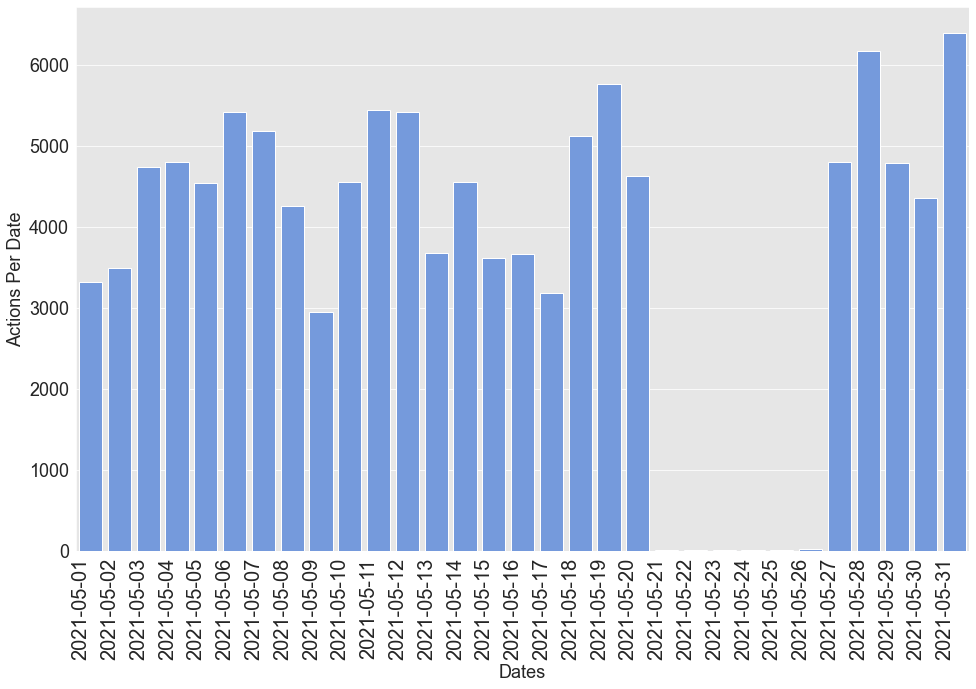

In [16]:
# Plot Barplot
count_by_dates['timestamp'] = pd.to_datetime(count_by_dates['timestamp'])
plt.figure(figsize=(16,10))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
all_dates = sns.barplot(x = count_by_dates['timestamp'].dt.date, y=count_by_dates['Count'], data = count_by_dates, color="cornflowerblue")
plt.xticks(rotation=90,horizontalalignment='right',fontweight='light',fontsize = 20)
plt.yticks(fontsize = 18)
plt.xlabel('Dates',fontsize = 18)
plt.ylabel('Actions Per Date',fontsize = 18)
plt.show()
all_dates.figure.savefig('All_Dates.png')

In [17]:
# Drop Outliers
count_by_dates = count_by_dates.drop(count_by_dates[count_by_dates.Count < 30].index)

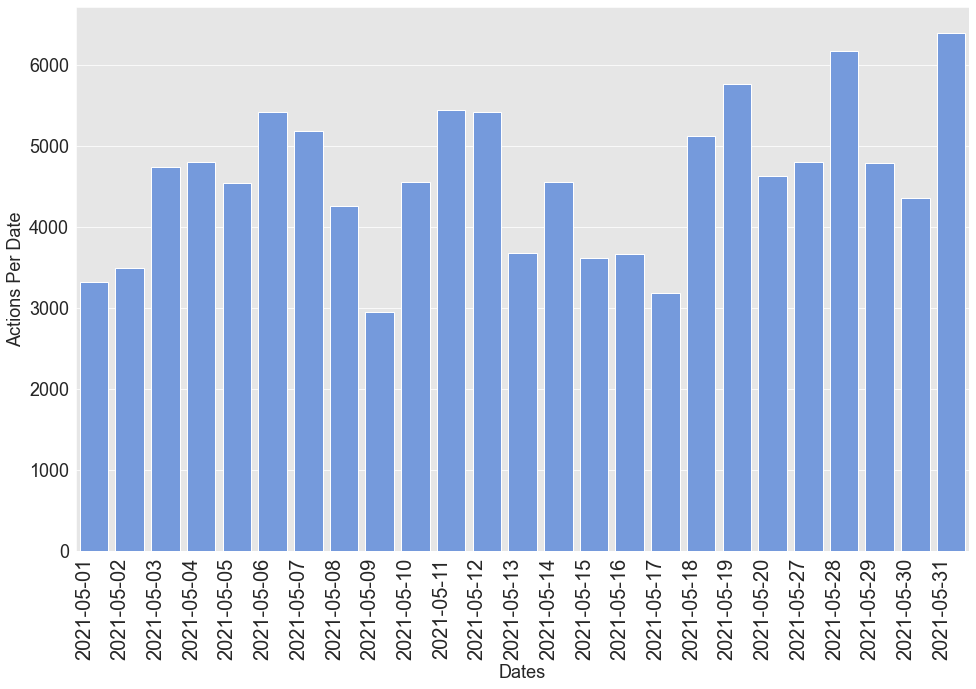

In [18]:
# Plot Barplot
plt.figure(figsize=(16,10))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
all_dates_filtered = sns.barplot(x = count_by_dates['timestamp'].dt.date, y=count_by_dates['Count'], data = count_by_dates, color="cornflowerblue")
plt.xticks(rotation=90,horizontalalignment='right',fontweight='light', fontsize = 20)
plt.yticks(fontsize = 18)
plt.xlabel('Dates',fontsize = 18)
plt.ylabel('Actions Per Date',fontsize = 18)
plt.show()
all_dates_filtered.figure.savefig('Dates_Filtered.png')

In [19]:
# Group by week days and get count of records
count_by_week_days = count_by_dates.groupby(count_by_dates['timestamp'].dt.day_name()).sum()

In [20]:
# Day Name with dates
count_by_dates['Days'] = count_by_dates['timestamp'].dt.day_name()

In [21]:
count_by_dates

,timestamp,Count,Days
0,2021-05-01,3313,Saturday
1,2021-05-02,3494,Sunday
2,2021-05-03,4737,Monday
3,2021-05-04,4796,Tuesday
4,2021-05-05,4539,Wednesday
5,2021-05-06,5419,Thursday
6,2021-05-07,5180,Friday
7,2021-05-08,4254,Saturday
8,2021-05-09,2950,Sunday
9,2021-05-10,4550,Monday


In [22]:
days_counts = count_by_dates.Days.value_counts()

In [23]:
count_by_week_days['Number'] = [days_counts.loc[idx] for idx in count_by_week_days.index]

In [24]:
count_by_week_days['PerDay'] = count_by_week_days['Count']/count_by_week_days['Number']

In [25]:
count_by_week_days

,Count,Number,PerDay
timestamp,,,
Friday,15914,3,5304.666667
Monday,18866,4,4716.500000
Saturday,15966,4,3991.500000
Sunday,14455,4,3613.750000
Thursday,18536,4,4634.000000
Tuesday,15359,3,5119.666667
Wednesday,15715,3,5238.333333


In [26]:
# Sort Weekdays
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
count_by_week_days = count_by_week_days.reindex(cats) 

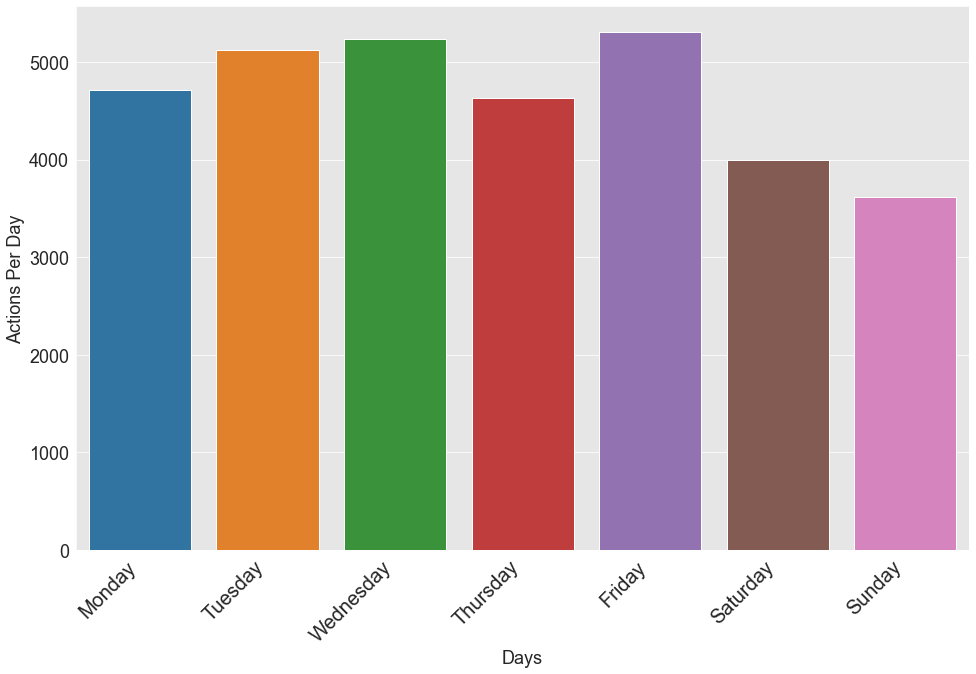

In [27]:
# Plot bar plot for weekdays
plt.figure(figsize=(16,10))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
perDay_plot = sns.barplot(y='PerDay', x=count_by_week_days['Count'].index, data=count_by_week_days)
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light', fontsize = 20)
plt.yticks(fontsize = 18)
plt.xlabel('Days',fontsize = 18)
plt.ylabel('Actions Per Day',fontsize = 18)
perDay_plot.figure.savefig('PerDay.png')

In [28]:
# Remove Outliers from Data
data_filtered = data[(data['timestamp'].dt.date < datetime.date(2021,5,21)) | (data['timestamp'].dt.date > datetime.date(2021,5,26))]

In [29]:
# Group by hour
count_by_hour = data_filtered.groupby([data_filtered['timestamp'].dt.hour]).size().reset_index(name='Count')

In [30]:
count_by_hour

,timestamp,Count
0,0,719
1,1,584
2,2,269
3,3,282
4,4,977
5,5,2752
6,6,5457
7,7,5036
8,8,5019
9,9,6525


In [31]:
# Convert to string and make time format of hour and minutes
count_by_hour['timestamp'] = count_by_hour['timestamp'].astype(str)
count_by_hour['timestamp'] = count_by_hour['timestamp'] + ":00"

In [32]:
# Calculate Average per hour
count_by_hour['Count'] = count_by_hour['Count']/len(count_by_dates)

In [33]:
count_by_hour

,timestamp,Count
0,0:00,28.76
1,1:00,23.36
2,2:00,10.76
3,3:00,11.28
4,4:00,39.08
5,5:00,110.08
6,6:00,218.28
7,7:00,201.44
8,8:00,200.76
9,9:00,261.00


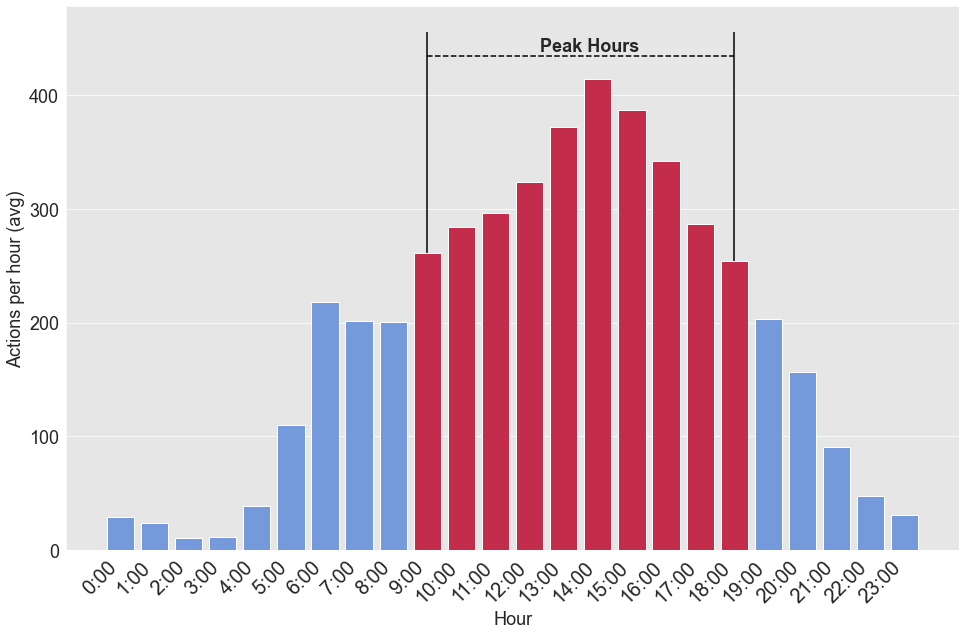

In [34]:
# Avergae hourly Bar Plot
plt.figure(figsize=(16,10))
clrs = ['cornflowerblue' if (x < 250) else 'crimson' for x in count_by_hour['Count']]
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
hours_plot = sns.barplot(x = count_by_hour['timestamp'], y=count_by_hour['Count'], data = count_by_hour, palette=clrs)
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light', fontsize = 20)
plt.yticks(fontsize = 18)
plt.xlabel('Hour',fontsize = 18)
plt.ylabel('Actions per hour (avg)',fontsize = 18)
plt.vlines(9,(count_by_hour.Count).iloc[9], (count_by_hour.Count).max()*1.1, color='black')
plt.vlines(18,(count_by_hour.Count).iloc[18], (count_by_hour.Count).max()*1.1,color='black')
plt.hlines(count_by_hour.Count.max()*1.05,9, 18,color='black',linestyle='dashed')
plt.text(12.3, count_by_hour.Count.max()*1.06,'Peak Hours', fontsize=18, fontweight = 'bold')
plt.show()
hours_plot.figure.savefig('PerHour.jpg')

In [35]:
max_action_hour = count_by_hour[count_by_hour['Count']==count_by_hour['Count'].max()]
min_action_hour = count_by_hour[count_by_hour['Count']==count_by_hour['Count'].min()]

In [36]:
print('Max Actions: ',int(max_action_hour['Count'].max()), ' at hour ',max_action_hour['timestamp'].max())
print('Min Actions: ',int(min_action_hour['Count'].min()), ' at hour ',min_action_hour['timestamp'].min())

Max Actions:  413  at hour  14:00
Min Actions:  10  at hour  2:00


In [37]:
vendor_lock_type_counts = data['vendor_lock_type'].value_counts()

In [38]:
vendor_lock_type_counts

universal              80047
danalock               29372
zw_340_5_1              1056
XS                       785
masterlock               399
codelockEasyAccess        91
codelockYaleDoorman       55
generic                   37
codelockIDLock            13
electric-lock              6
zw_560_3_1                 4
zw_270_9_1                 4
zw_883_3_1                 2
Name: vendor_lock_type, dtype: int64

In [39]:
print('Universal Percentage: ',vendor_lock_type_counts[0]/vendor_lock_type_counts.sum())
print('danalock Percentage: ',vendor_lock_type_counts[1]/vendor_lock_type_counts.sum())

Universal Percentage:  0.7155294937919568
danalock Percentage:  0.26255240410830333


In [40]:
vendor_lock_type_counts/vendor_lock_type_counts.sum()

universal              0.715529
danalock               0.262552
zw_340_5_1             0.009439
XS                     0.007017
masterlock             0.003567
codelockEasyAccess     0.000813
codelockYaleDoorman    0.000492
generic                0.000331
codelockIDLock         0.000116
electric-lock          0.000054
zw_560_3_1             0.000036
zw_270_9_1             0.000036
zw_883_3_1             0.000018
Name: vendor_lock_type, dtype: float64

In [41]:
# dataframe for lock types
df_lock_types = pd.DataFrame(vendor_lock_type_counts)

In [42]:
# Compile lock types with less percenatge to one entry for beter visualization
df_lock_types.reset_index(inplace=True)
df_lock_types = df_lock_types.rename(columns={"index": "Lock_Type", "vendor_lock_type": "Count"})
df_lock_types.loc[(df_lock_types.Count < 2000),'Lock_Type']='Other'
df_lock_types = df_lock_types.set_index('Lock_Type',drop=True)
df_lock_types = df_lock_types.groupby(df_lock_types.index).sum()
df_lock_types=df_lock_types.sort_values('Count', ascending=False)

In [43]:
df_lock_types

,Count
Lock_Type,
universal,80047
danalock,29372
Other,2452


71.55295014381409
26.2552410364151
2.1918101236224174


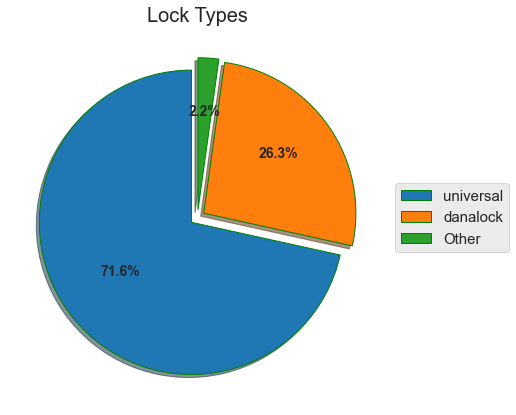

In [44]:
# PieChart for Lock Types
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating explode data
explode = (0.05, 0.05, 0.05)

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    print(pct)
    return "{:.1f}%\n".format(pct, absolute)

           
           

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(df_lock_types['Count'],
								autopct = lambda pct: func(pct, df_lock_types['Count']),
								shadow = True,
								startangle = 90,
                                  explode= explode,
								wedgeprops = wp,
								)

ax.legend(wedges, df_lock_types.index,
		loc ="center left",
        fontsize = 15,
		bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 14, weight ="bold")
ax.set_title("Lock Types",size = 20)

# show plot
plt.show()
fig.savefig('lock_types.png')

In [45]:
print('Most Used Lock Type: ',vendor_lock_type_counts.index[0], ' with count: ' ,vendor_lock_type_counts[0])
print('Least Used Lock Type: ',vendor_lock_type_counts.index[len(vendor_lock_type_counts)-1], ' with count: ' ,vendor_lock_type_counts[len(vendor_lock_type_counts)-1])
print('Known Lock Types:', vendor_lock_type_counts.sum())
print('Unknown Lock Types:', data['vendor_lock_type'].isna().sum())

Most Used Lock Type:  universal  with count:  80047
Least Used Lock Type:  zw_883_3_1  with count:  2
Known Lock Types: 111871
Unknown Lock Types: 2981


In [46]:
# Lock Country data
data['lock_country_iso'].value_counts()

NO    72508
SE      696
Name: lock_country_iso, dtype: int64

In [47]:
# Lock postal code data
data['lock_postal_code'].value_counts()

0575    3053
0478    2884
0661    2866
0175    2564
0196    2135
        ... 
4521       1
5610       1
3612       1
0266       1
2953       1
Name: lock_postal_code, Length: 251, dtype: int64

In [48]:
print('Unique Users: ', data['user_id'].nunique())

Unique Users:  8616


In [49]:
# User Counry data
country_data = data['user_country_iso'].value_counts()

In [50]:
# Percentage of users by country
country_data/ country_data.sum()

NO    0.979119
SE    0.011908
DK    0.002707
FR    0.001485
GB    0.001090
IT    0.001028
FI    0.000571
DE    0.000404
IS    0.000378
US    0.000360
CZ    0.000281
BE    0.000255
ES    0.000211
PL    0.000088
NL    0.000062
CH    0.000026
EE    0.000026
Name: user_country_iso, dtype: float64

In [51]:
print('Total Countries: ', data['user_country_iso'].nunique())

Total Countries:  17


In [52]:
device_type_count = data['device_platform'].value_counts()
print(device_type_count)

iOS        87740
android    26050
Name: device_platform, dtype: int64


In [53]:
print('IOS Percentage: ', device_type_count[0]/data['device_platform'].value_counts().sum())

IOS Percentage:  0.7710695140170489


77.10695266723633
22.89304882287979


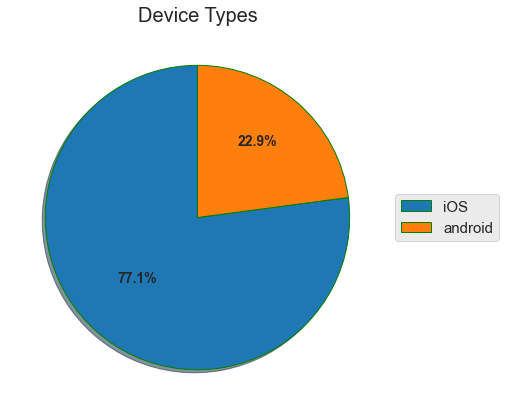

In [54]:
# Pie Chart of device type
wp = { 'linewidth' : 1, 'edgecolor' : "green" }



# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    print(pct)
    return "{:.1f}%\n".format(pct, absolute)

           
           

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(device_type_count,
								autopct = lambda pct: func(pct, device_type_count),
								shadow = True,
								startangle = 90,
								wedgeprops = wp,
								)

ax.legend(wedges, device_type_count.index,
		loc ="center left",
        fontsize = 15,
		bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 14, weight ="bold")
ax.set_title("Device Types",size = 20)

# show plot
plt.show()
fig.savefig('device_type.png')

In [55]:
# App Versions
data['device_app_version'].value_counts()

Unloc 4.6.4 (988)     45081
Unloc 4.6.2 (950)     25139
Unloc 4.6.3 (972)     22202
Unloc 4.6.3 (970)      6786
Unloc 4.6.5 (994)      6456
Unloc 4.5.9 (904)      2879
Unloc 4.5.10 (906)     2782
Unloc 4.6.0 (932)      1343
Unloc 4.6.1 (938)       773
Unloc 4.6.4 (984)       101
Unloc 4.6.6 (996)        68
Unloc 4.6.5 (992)        54
Unloc 4.6.4 (982)        28
Unloc 4.6.4 (986)        20
Unloc 4.6.6 (998)        13
Unloc 4.6.3 (962)        13
Unloc 4.6.5 (990)        13
Unloc 4.6.4 (980)        12
Unloc 4.6.2 (948)         9
Unloc 4.6.7 (1010)        7
Unloc 4.6.4 (976)         5
Unloc 4.3.5 (370)         3
Unloc 4.6.9 (1036)        2
Unloc 4.5.8 (900)         1
Name: device_app_version, dtype: int64

In [57]:
# Lock Holder Types
lock_holder_type = data['lock_holder_type'].value_counts()
print(lock_holder_type)

cooperative        62822
lockholder         14458
propertymanager     7125
office              5610
coworking           3114
Name: lock_holder_type, dtype: int64


In [58]:
lock_holder_type/lock_holder_type.sum()

cooperative        0.674570
lockholder         0.155247
propertymanager    0.076507
office             0.060239
coworking          0.033437
Name: lock_holder_type, dtype: float64

67.45696663856506
15.52470177412033
7.650677859783173
6.02390244603157
3.3437490463256836


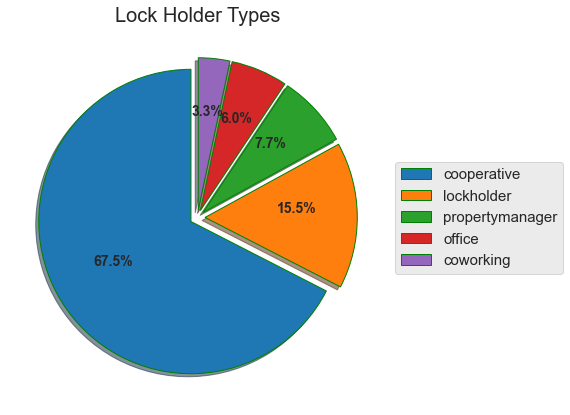

In [59]:
# Pie Char Lock holder types
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating explode data
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    print(pct)
    return "{:.1f}%\n".format(pct, absolute)

           
           

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(lock_holder_type,
								autopct = lambda pct: func(pct, lock_holder_type),
								shadow = True,
								startangle = 90,
                                  explode= explode,
								wedgeprops = wp,
								)

ax.legend(wedges, lock_holder_type.index,
		loc ="center left",
        fontsize = 15,
		bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 14, weight ="bold")
ax.set_title("Lock Holder Types",size = 20)

# show plot
plt.show()
fig.savefig('lockholdertypes_type.png')

In [60]:
data['device_locale'].value_counts()

nb_NO    86735
en_NO    10148
en_GB     3745
en_US     2635
sv_SE     1638
         ...  
bs_NO        1
nb_AT        1
en_EE        1
it_GB        1
nb_PT        1
Name: device_locale, Length: 131, dtype: int64